In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns    
%matplotlib inline

In [10]:
df=pd.read_excel("Reflux_data/Final_V1/Final_V2_test1.xlsx")

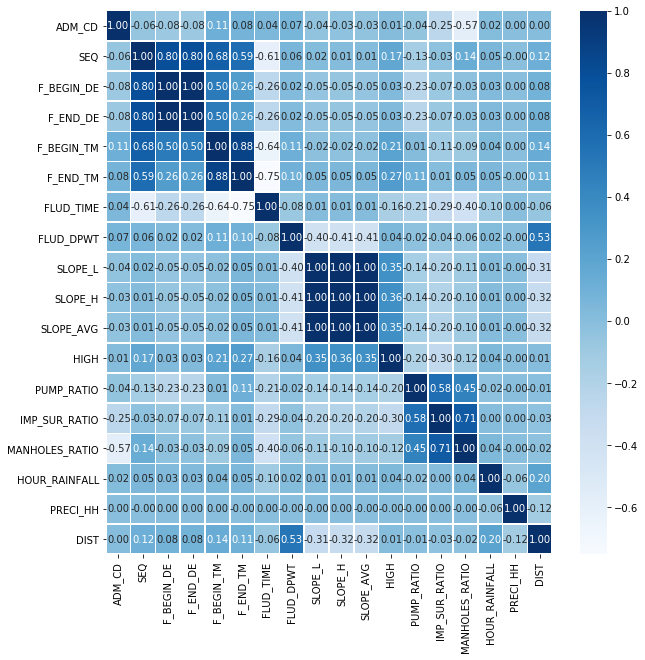

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(data = df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')
plt.show()

In [ ]:
df.head()

# sklearn KNeighborsClassifier 사용
* http://hleecaster.com/ml-knn-classifier-example/

In [6]:
import numpy as np # 다차원배열, 선형대수 연산 
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

In [5]:
df_data = df[["FLUD_DPWT","SLOPE_AVG","HIGH","F_WEIGHT","IMP_W_SUM","R_W_SUM","PUMP_RATIO","MANHOLES_RATIO"]].copy()
df_labels = df["DIST"].copy()
df_data.to_excel("./정제데이터/df_data.xlsx")

KeyError: "['PUMP_RATIO', 'MANHOLES_RATIO'] not in index"

In [7]:
# count가 왜 이렇게 나오지...? 6.096000e+03
df_data["PUMP_RATIO"].describe()

count    6.096000e+03
mean     1.701339e-07
std      1.313922e-07
min      0.000000e+00
25%      3.042751e-08
50%      1.509054e-07
75%      2.399520e-07
max      4.115226e-07
Name: PUMP_RATIO, dtype: float64

In [12]:
df_data.describe()

,FLUD_DPWT,SLOPE_AVG,HIGH,F_WEIGHT,IMP_W_SUM,R_W_SUM,PUMP_RATIO,MANHOLES_RATIO
count,6096.000000,6096.000000,6096.000000,6096.000000,6096.000000,6096.000000,6.096000e+03,6096.000000
mean,0.024485,13.709646,13.476772,0.059185,5.811779,199.661773,1.701339e-07,0.014181
std,0.130907,16.444570,24.958987,0.043944,6.996374,1032.882740,1.313922e-07,0.005995
min,0.000000,1.000000,0.300000,0.016667,0.616000,0.000000,0.000000e+00,0.001618
25%,0.000000,1.000000,2.760000,0.016667,1.948800,0.000000,3.042751e-08,0.009250
50%,0.000000,11.000000,4.690000,0.075019,2.758629,0.005000,1.509054e-07,0.016808
75%,0.000000,22.500000,9.110000,0.075019,4.047771,0.050000,2.399520e-07,0.017684
max,1.875000,80.000000,171.040000,0.149925,19.942400,7499.700000,4.115226e-07,0.023885


In [14]:
# 정규화 함수
def min_max_normalize(lst):
    normalized = []
    
    for value in lst:
        normalized_num = (value - min(lst)) / (max(lst) - min(lst))
        normalized.append(normalized_num)
    
    return normalized

In [19]:
    # 정규화하기(실패)
for x in range(len(df_data.columns)):
        df_data[df[df_data.columns[x]]] = min_max_normalize(df[df_data.columns[x]])
df_data.describe()

IndentationError: expected an indented block (<ipython-input-19-1ae6c8054831>, line 3)

In [20]:
#세트분리
from sklearn.model_selection import train_test_split
training_data, validation_data , training_labels, validation_labels = train_test_split(df_data, df_labels, test_size = 0.2, random_state = 100)

In [21]:
#8:2로나뉨
print(len(training_data))
print(len(validation_data))
print(len(training_labels))
print(len(validation_labels))

4876
1220
4876
1220


In [23]:
#모델생성
#n_neighbors로 k를 정해줘야 한다.
#x 데이터를 분류를 할 때 k개의 이웃 중 거리가 가까운 이웃의 영향을 더 많이 받도록 가중치를 설정하려면 weights = "distance"를 지정

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)

In [24]:
#생성한 모델에 데이터를 학습시키자. 위에서 나눠놓은 학습 데이터 세트(training_data, training_labels)로 학습시킨다.
classifier.fit(training_data, training_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [25]:
#모델의 정확도(Accuracy) 평가하기
#위에서 데이터 세트를 나눠놨기 때문에 학습시킨 모델을 테스트 할 수 있다. 당연히 검증 세트의 데이터와 레이블을 넣어줘야 한다.
print(classifier.score(validation_data, validation_labels))

0.8959016393442623


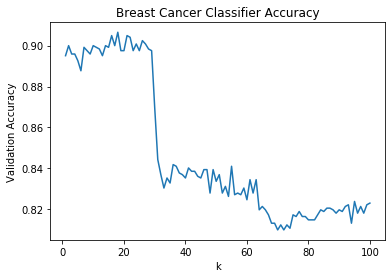

In [26]:
#k값을 1부터 100까지 바꿔가면서 모델 정확도를 구해서 저장해놓고, 시각화를 해보자.
import matplotlib.pyplot as plt

k_list = range(1,101)
accuracies = []

for k in k_list:
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(training_data, training_labels)
  accuracies.append(classifier.score(validation_data, validation_labels))

plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Breast Cancer Classifier Accuracy")
plt.show()

*http://hleecaster.com/ml-knn-regression-example/

In [27]:
from sklearn.neighbors import KNeighborsRegressor

In [28]:
# 회귀 모델을 생성한다. 이 때 n_neighbors, 즉 k를 정해줘야 한다.
# 그리고 위에서 설정한 가중 평균을 적용하기 위해 weights = "distance"를 넣어주었다.
# (이렇게 써주지 않으면 weight의 기본값은 단순한 평균을 사용하는 방법, “uniform”이 적용된다.)
regressor = KNeighborsRegressor(n_neighbors = 3)

In [29]:
a=df_data[["SLOPE_AVG","HIGH","F_WEIGHT","IMP_W_SUM","R_W_SUM","PUMP_RATIO","MANHOLES_RATIO"]].iloc[0:2120]
b=df_data[["SLOPE_AVG","HIGH","F_WEIGHT","IMP_W_SUM","R_W_SUM","PUMP_RATIO","MANHOLES_RATIO"]].iloc[3049:5170]

In [30]:
training_points =pd.concat([a,b],ignore_index=True)
training_points

,SLOPE_AVG,HIGH,F_WEIGHT,IMP_W_SUM,R_W_SUM,PUMP_RATIO,MANHOLES_RATIO
0,1.0,3.66,0.075019,19.9424,0.021,4.115226e-07,0.016387
1,1.0,3.66,0.075019,19.9424,0.051,4.115226e-07,0.016387
2,1.0,3.66,0.075019,19.9424,4.346,4.115226e-07,0.016387
3,1.0,3.66,0.075019,19.9424,0.080,4.115226e-07,0.016387
4,1.0,3.66,0.075019,19.9424,0.091,4.115226e-07,0.016387
...,...,...,...,...,...,...,...
4236,22.5,2.01,0.075019,19.6608,0.060,0.000000e+00,0.018647
4237,22.5,2.01,0.075019,19.6608,7.995,0.000000e+00,0.018647
4238,22.5,2.01,0.075019,19.6608,7041.385,0.000000e+00,0.018647
4239,22.5,2.01,0.075019,19.6608,5958.095,0.000000e+00,0.018647


In [31]:
training_labels = pd.concat([df_labels.iloc[0:2120],df_labels.iloc[3049:5170]],ignore_index=True)
training_labels

0       1
1       1
2       1
3       1
4       1
       ..
4236    0
4237    0
4238    0
4239    0
4240    0
Name: DIST, Length: 4241, dtype: int64

In [32]:
regressor.fit(training_points, training_labels)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [33]:
#c=df_data[["SLOPE_AVG","HIGH","F_WEIGHT","IMP_W_SUM","R_W_SUM","PUMP_RATIO","MANHOLES_RATIO"]].iloc[2120:3049]
#d=df_data[["SLOPE_AVG","HIGH","F_WEIGHT","IMP_W_SUM","R_W_SUM","PUMP_RATIO","MANHOLES_RATIO"]].iloc[5170:6096]
#test_points = df_data[["SLOPE_AVG","HIGH","F_WEIGHT","IMP_W_SUM","R_W_SUM","PUMP_RATIO","MANHOLES_RATIO"]].iloc[2120:3049]
#test_points.describe()
test_points = [[13,32,0.075019,2.146455,0.010000,2.102446e-07,0.016867],
              [60,200,0.075019,2.146455,0.010000,2.102446e-07,0.016867]]

In [34]:
guesses = regressor.predict(test_points)
guesses

array([1., 1.])